In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model

from sklearn.preprocessing import MinMaxScaler

In [167]:
tesla_df=pd.read_csv("TSLA.csv")
bit_df=pd.read_csv("BTC.csv")

In [78]:
bit_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,07-01-2019,4078.584961,4092.613525,4020.894043,4025.248291,4025.248291,5.228626e+09
1,08-01-2019,4028.472168,4109.020996,3996.955322,4030.847900,4030.847900,5.306593e+09
2,09-01-2019,4031.552002,4068.403564,4022.662842,4035.296387,4035.296387,5.115905e+09
3,10-01-2019,4034.411377,4064.066650,3659.174561,3678.924561,3678.924561,6.874144e+09
4,11-01-2019,3674.015381,3713.881836,3653.069824,3687.365479,3687.365479,5.538713e+09
5,12-01-2019,3686.973145,3698.978271,3653.810791,3661.301025,3661.301025,4.778171e+09
6,13-01-2019,3658.868164,3674.760010,3544.927246,3552.953125,3552.953125,4.681302e+09
7,14-01-2019,3557.311035,3727.836182,3552.285156,3706.052246,3706.052246,5.651384e+09
8,15-01-2019,3704.216309,3720.153320,3619.949219,3630.675293,3630.675293,5.537192e+09
9,16-01-2019,3631.509766,3685.777100,3624.673340,3655.006836,3655.006836,5.394457e+09


In [203]:
merged=pd.merge(bit_df,tesla_df, how="left", on=['Date'])

In [204]:
new_df=merged[["Date","Close_x","Close_y"]]

In [213]:
#new_df.tail(60)

In [205]:
new_df=new_df.rename(columns={"Close_y":"tesla_closed","Close_x":"bitcoin_closed"})

In [206]:
new_df["bitcoin_closed"]=new_df["bitcoin_closed"].fillna(method='ffill')
new_df["tesla_closed"]=new_df["tesla_closed"].fillna(method='ffill')

In [207]:
count_nan = new_df["tesla_closed"].isnull().sum()
count_nan

0

In [107]:
#new_df=new_df.drop(columns=["Date"])

## Strong Correlation

In [174]:
pearsonr(new_df["bitcoin_closed"], temp)

(0.9036097186596, 0.0)

In [175]:
new_df.head()

,Date,bitcoin_closed,tesla_closed
0,07-01-2019,4025.248291,66.991997
1,08-01-2019,4030.847900,67.070000
2,09-01-2019,4035.296387,67.706001
3,10-01-2019,3678.924561,68.994003
4,11-01-2019,3687.365479,69.452003


In [108]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(new_df)
training_data

array([[0.00975226, 0.02612644],
       [0.00983952, 0.02619176],
       [0.00990885, 0.02672437],
       ...,
       [0.70904045, 0.78735731],
       [0.68985161, 0.74626415],
       [0.66775735, 0.7509957 ]])

In [43]:
training_data[0]

array([0.02612644, 0.00975226])

In [109]:
pearsonr(training_data[:,0],training_data[:,1])

(0.9036097186596002, 0.0)

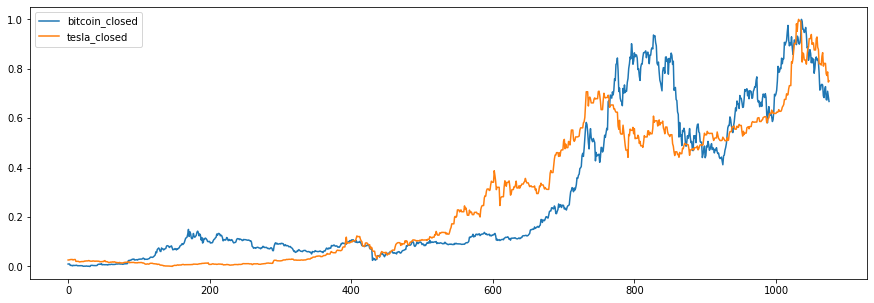

In [176]:
plt.figure(figsize=(15,5))
plt.plot(training_data[:,0],label='bitcoin_closed')
plt.plot(training_data[:,1],label="tesla_closed")
plt.legend()

In [163]:
new_df.head()

,Date,bitcoin_closed,tesla_closed,new_date
0,07-01-2019,4025.248291,66.991997,2019-07-01
1,08-01-2019,4030.847900,67.070000,2019-08-01
2,09-01-2019,4035.296387,67.706001,2019-09-01
3,10-01-2019,3678.924561,68.994003,2019-10-01
4,11-01-2019,3687.365479,69.452003,2019-11-01


In [209]:
new_df['Date'] = pd.to_datetime(new_df.Date, format="%d-%m-%Y")
new_df.head()

,Date,bitcoin_closed,tesla_closed
0,2019-01-07,4025.248291,66.991997
1,2019-01-08,4030.847900,67.070000
2,2019-01-09,4035.296387,67.706001
3,2019-01-10,3678.924561,68.994003
4,2019-01-11,3687.365479,69.452003


In [210]:
data_training = new_df[new_df['Date']< '2021-10-19'].copy()
len(data_training)

1016

In [212]:
data_test = new_df[new_df['Date']> '2021-10-19']
len(data_test)

59

In [214]:
training_data = data_training.drop(["Date"], axis = 1)
training_data.head()

,bitcoin_closed,tesla_closed
0,4025.248291,66.991997
1,4030.847900,67.070000
2,4035.296387,67.706001
3,3678.924561,68.994003
4,3687.365479,69.452003


In [215]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01041157, 0.03682066],
       [0.01050473, 0.03691272],
       [0.01057874, 0.03766334],
       ...,
       [0.95655401, 0.95272019],
       [0.96755889, 0.95272019],
       [0.97541962, 0.98468063]])

In [216]:
X_train = [] 
Y_train = []
for i in range(60, training_data.shape[0]):
    
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [217]:
X_train.shape

(956, 60, 2)

In [218]:
Y_train.shape

(956, 2)

In [219]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout